<a href="https://colab.research.google.com/github/pathbit/pathbit-academy-ai/blob/master/0003_rag_vector_database/notebooks/rag_vector_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ✨ **Pathbit Academy AI**
---

## 🎯 **Artigo 0003: RAG e Vector Database o que você precisa saber para se destacar**

🚨 **IMPORTANTE:**

*💥 QUALQUER PESSOA QUE CONSIGA RESOLVER A EQUAÇÃO `2 + 2 = ?` PODE CONTINUAR OS PASSOS ABAIXO*

**Artigo de referência:** [https://github.com/pathbit/pathbit-academy-ai/blob/master/0003_rag_vector_database/article/ARTICLE.md](https://github.com/pathbit/pathbit-academy-ai/blob/master/0003_rag_vector_database/article/ARTICLE.md)

**Artigos anteriores:** 
- [Artigo 0001: LLM vs LRM](https://github.com/pathbit/pathbit-academy-ai/blob/master/0001_llm_x_lrm/article/ARTICLE.md)
- [Artigo 0002: Embeddings e Vetorização](https://github.com/pathbit/pathbit-academy-ai/blob/master/0002_embeddings_vetorizacao/article/ARTICLE.md)

---

## 🎯 **Este notebook contém TUDO que você precisa:**
- ✅ **Instalação automática** de dependências
- ✅ **Configuração** de modelos
- ✅ **Implementação completa de RAG** com Chroma
- ✅ **Código pronto para usar** - sem arquivos externos
- ✅ **Funciona no Google Colab** e localmente
- ✅ **Visualizações** e análises detalhadas


In [1]:
### 🔧 **Correção automática para Google Colab**
#🚨 **IMPORTANTE:** Se você estiver executando no Google Colab, esta célula corrige automaticamente problemas de compatibilidade do `tqdm`.

# Importações principais
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
from datetime import datetime

# Configuração de visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Configuração de fonte para evitar warnings de emojis
plt.rcParams['font.family'] = 'DejaVu Sans'
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# Suprimir avisos do tqdm
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tqdm")

print("✅ Ambiente configurado com sucesso!")
print(f"📅 Data/Hora: {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}")
print(f"🐍 Python: {sys.version.split()[0]}")
print(f"📁 Diretório: {os.getcwd()}")


✅ Ambiente configurado com sucesso!
📅 Data/Hora: 02/10/2025 19:43:17
🐍 Python: 3.12.7
📁 Diretório: /Users/elielsousa/Projects/pathbit/github/pathbit-academy-ai/0003_rag_vector_database/notebooks


In [2]:
# 🔧 CORREÇÃO AUTOMÁTICA PARA GOOGLE COLAB
# ==========================================
# Esta célula resolve automaticamente conflitos de dependências do tqdm

# Detectar se estamos no Google Colab
try:
    import google.colab
    IN_COLAB = True
    print("🌐 Detectado: Google Colab")
    print("🔧 Aplicando correção para conflito de tqdm...")
    
    # CORREÇÃO: Atualizar tqdm para resolver conflitos de dependências
    get_ipython().run_line_magic('pip', 'install --upgrade tqdm>=4.67 --force-reinstall --quiet')
    print("✅ tqdm atualizado com sucesso!")
    print("📦 Versão do tqdm corrigida para resolver conflitos com datasets e dataproc-spark-connect")
    
except ImportError:
    IN_COLAB = False
    print("💻 Detectado: Ambiente Local")
    print("ℹ️  Correção do tqdm não necessária no ambiente local")

print("\n🎯 Ambiente configurado! Continue com a próxima célula.")


💻 Detectado: Ambiente Local
ℹ️  Correção do tqdm não necessária no ambiente local

🎯 Ambiente configurado! Continue com a próxima célula.


# 📦 INSTALAÇÃO DAS DEPENDÊNCIAS
# ================================
# Instalação das bibliotecas necessárias para trabalhar com RAG e Vector Databases


In [3]:
# Instalar dependências (Colab precisa do %pip)
if IN_COLAB:
    print("📦 Instalando dependências no Google Colab...")
    get_ipython().run_line_magic('pip', 'install -q chromadb sentence-transformers scikit-learn matplotlib seaborn pandas plotly tqdm>=4.67 python-dotenv')
else:
    print("📦 Verificando dependências no ambiente local...")
    try:
        import numpy as np
        import pandas as pd
        import matplotlib.pyplot as plt
        import seaborn as sns
        import chromadb
        from sentence_transformers import SentenceTransformer
        from sklearn.metrics.pairwise import cosine_similarity
        from dotenv import load_dotenv
        print("✅ Todas as dependências já estão instaladas!")
    except ImportError as e:
        print(f"⚠️ Instalando dependências faltantes: {e}")
        import subprocess
        import sys
        
        subprocess.check_call([
            sys.executable, "-m", "pip", "install", "-q",
            "chromadb", "sentence-transformers", "scikit-learn", "matplotlib", 
            "seaborn", "pandas", "plotly", "tqdm>=4.67", "python-dotenv"
        ])

# Importações principais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chromadb
from chromadb.config import Settings
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from dotenv import load_dotenv

# Suprimir avisos do tqdm e outros warnings desnecessários
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="tqdm")
warnings.filterwarnings("ignore", category=FutureWarning)

# Configurações adicionais
plt.style.use('default')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("🎯 Notebook pronto para usar!")
print("📊 Dependências carregadas com sucesso!")


📦 Verificando dependências no ambiente local...


/Users/elielsousa/Projects/pathbit/github/pathbit-academy-ai/0003_rag_vector_database/.venv/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


✅ Todas as dependências já estão instaladas!
🎯 Notebook pronto para usar!
📊 Dependências carregadas com sucesso!


## 📚 1. Importações e Configuração

Vamos importar todas as bibliotecas necessárias para trabalhar com RAG e Vector Databases.


In [ ]:
# Importações específicas para RAG e Vector Databases
import chromadb
from chromadb.config import Settings
from sentence_transformers import SentenceTransformer

# Para exemplos com Groq (opcional)
import os
from dotenv import load_dotenv

# 🔍 VERIFICAÇÃO INTELIGENTE DA API KEY DO GROQ
# ===============================================
# Detecta ambiente e captura API key de forma apropriada

def verificar_groq_key_inicial():
    """Verifica e captura GROQ_API_KEY de forma inteligente"""
    try:
        # Primeiro, tentar arquivo .env (ambiente local)
        load_dotenv()
        groq_api_key = os.getenv('GROQ_API_KEY')
        
        if groq_api_key:
            print("🔑 API Key do Groq encontrada no arquivo .env!")
            return groq_api_key
        
        # Se não encontrou no .env, tentar capturar do usuário (Colab)
        if IN_COLAB:
            print("🌐 Detectado Google Colab - capturando API key do usuário...")
            try:
                from getpass import getpass
                print("🔑 Digite sua GROQ_API_KEY (será ocultada):")
                groq_api_key = getpass("GROQ_API_KEY: ").strip()
                
                if groq_api_key:
                    print("✅ GROQ_API_KEY capturada com sucesso!")
                    return groq_api_key
                else:
                    print("⚠️ GROQ_API_KEY não fornecida (opcional)")
                    return None
            except Exception as e:
                print(f"❌ Erro ao capturar API key: {e}")
                return None
        else:
            print("⚠️ API Key do Groq não encontrada no arquivo .env (opcional)")
            print("💡 Para usar localmente, crie um arquivo .env com:")
            print("   GROQ_API_KEY=sua_chave_aqui")
            return None
            
    except Exception as e:
        print(f"⚠️ Arquivo .env não encontrado ou erro: {e}")
        return None

# Verificar e capturar API key
GROQ_API_KEY = verificar_groq_key_inicial()

# Configuração do modelo de embeddings
EMBEDDING_MODEL = "all-MiniLM-L6-v2"
print(f"🤖 Modelo de embeddings: {EMBEDDING_MODEL}")

# Inicializar modelo de embeddings
embedding_model = SentenceTransformer(EMBEDDING_MODEL)
print("✅ Modelo de embeddings carregado com sucesso!")

🔑 API Key do Groq encontrada no arquivo .env!
🤖 Modelo de embeddings: all-MiniLM-L6-v2
✅ Modelo de embeddings carregado com sucesso!


In [6]:
# 🔧 CORREÇÃO FINAL PARA TELEMETRIA DO CHROMADB
# ==============================================
# Esta célula DEVE ser executada ANTES da criação do cliente Chroma

import os
import warnings
import logging

# Desabilitar telemetria do ChromaDB completamente
os.environ['CHROMA_TELEMETRY'] = 'false'
os.environ['CHROMA_DISABLE_TELEMETRY'] = '1'
os.environ['ANONYMIZED_TELEMETRY'] = 'False'

# Suprimir todos os warnings e erros relacionados à telemetria
warnings.filterwarnings("ignore", message=".*telemetry.*")
warnings.filterwarnings("ignore", message=".*Failed to send telemetry.*")
warnings.filterwarnings("ignore", message=".*capture.*")

# Desabilitar logs do ChromaDB relacionados à telemetria
logging.getLogger('chromadb.telemetry').setLevel(logging.CRITICAL)
logging.getLogger('chromadb').setLevel(logging.WARNING)

print("✅ Telemetria do ChromaDB completamente desabilitada")
print("🔧 Configuração aplicada para evitar erros de telemetria")
print("💡 Versão recomendada: chromadb>=0.5.0")

✅ Telemetria do ChromaDB completamente desabilitada
🔧 Configuração aplicada para evitar erros de telemetria
💡 Versão recomendada: chromadb>=0.5.0


In [7]:
# 🎨 FUNÇÃO DE FORMATAÇÃO VISUAL
# ===============================
# Função para exibir resultados com formatação especial e visual atrativa

def print_resultado_destacado(titulo, conteudo, tipo="info"):
    """
    Exibe resultados com formatação especial e visual atrativa.
    
    Args:
        titulo (str): Título do resultado
        conteudo (str): Conteúdo a ser exibido
        tipo (str): Tipo de resultado ("info", "success", "warning", "error")
    """
    # Cores e símbolos baseados no tipo
    cores = {
        "info": {"cor": "🔵", "emoji": "📊", "borda": "=", "cor_ascii": "🔷"},
        "success": {"cor": "🟢", "emoji": "✅", "borda": "=", "cor_ascii": "🔷"},
        "warning": {"cor": "🟡", "emoji": "⚠️", "borda": "-", "cor_ascii": "🔶"},
        "error": {"cor": "🔴", "emoji": "❌", "borda": "!", "cor_ascii": "🔴"}
    }
    
    config = cores.get(tipo, cores["info"])
    
    # Criar formatação visual
    largura = 70
    borda = config["borda"] * largura
    
    print(f"\n{config['emoji']} {borda}")
    print(f"{config['cor']} {titulo.center(largura-4)} {config['cor']}")
    print(f"{config['emoji']} {borda}")
    print(f"\n{conteudo}")
    print(f"\n{config['emoji']} {borda}")
    print(f"{config['cor']} {'🎯 RESULTADO CONCLUÍDO 🎯'.center(largura-4)} {config['cor']}")
    print(f"{config['emoji']} {borda}\n")

# Testar a formatação
print_resultado_destacado("TESTE DE FORMATAÇÃO", "Esta é uma demonstração da nova formatação visual que será usada em todos os resultados importantes do notebook!", "success")



✅ ======================================================================
🟢                        TESTE DE FORMATAÇÃO                         🟢
✅ ======================================================================

Esta é uma demonstração da nova formatação visual que será usada em todos os resultados importantes do notebook!

✅ ======================================================================
🟢                      🎯 RESULTADO CONCLUÍDO 🎯                       🟢
✅ ======================================================================



## 🎯 2. Dados de Exemplo

Vamos criar alguns documentos de exemplo para demonstrar o funcionamento do RAG.


In [8]:
# Documentos de exemplo sobre inteligência artificial
documents = [
    """
    RAG (Retrieval Augmented Generation) é uma técnica que combina busca de informações 
    com geração de texto. O processo funciona em três etapas principais: primeiro, 
    a consulta do usuário é convertida em um embedding; segundo, esse embedding é usado 
    para buscar documentos relevantes em uma base de dados vetorial; terceiro, os 
    documentos encontrados são usados como contexto para gerar uma resposta mais precisa 
    e baseada em fatos.
    """,
    
    """
    Vector Databases são sistemas especializados em armazenar e buscar embeddings. 
    Diferentes tipos incluem Chroma (simples e fácil de usar), Pinecone (alta performance 
    em produção), Weaviate (rico em funcionalidades), Qdrant (muito rápido) e FAISS 
    (gratuito e flexível). A escolha depende do volume de dados, latência necessária, 
    orçamento e complexidade do projeto.
    """,
    
    """
    Embeddings são representações numéricas de texto que capturam o significado semântico. 
    Modelos como Sentence-BERT, E5 e Universal Sentence Encoder são populares para 
    gerar embeddings de qualidade. A dimensão do embedding (384, 512, 1024) afeta 
    tanto a qualidade quanto o custo computacional. Para português, modelos multilíngues 
    como E5-multilingual funcionam melhor.
    """,
    
    """
    Fine-tuning é o processo de ajustar um modelo de linguagem em dados específicos 
    para melhorar seu desempenho em tarefas particulares. Requer dados de treinamento 
    de qualidade, tempo computacional significativo e expertise técnica. É ideal quando 
    você precisa que o modelo "pense" de forma diferente ou tenha conhecimento específico 
    incorporado em seus parâmetros.
    """,
    
    """
    LangChain é um framework popular para construir aplicações com modelos de linguagem. 
    Oferece componentes modulares para document loaders, text splitters, embeddings, 
    vector stores, retrievers e chains. Facilita a implementação de sistemas RAG 
    complexos com poucas linhas de código, mas pode ser overkill para casos simples.
    """
]

print(f"📄 Criados {len(documents)} documentos de exemplo")
print(f"📊 Tamanho médio: {np.mean([len(doc) for doc in documents]):.0f} caracteres")

# Visualizar estatísticas dos documentos
doc_stats = pd.DataFrame({
    'Documento': range(1, len(documents) + 1),
    'Tamanho (chars)': [len(doc) for doc in documents],
    'Palavras': [len(doc.split()) for doc in documents]
})

print("\n📈 Estatísticas dos documentos:")
print(doc_stats)


📄 Criados 5 documentos de exemplo
📊 Tamanho médio: 399 caracteres

📈 Estatísticas dos documentos:
   Documento  Tamanho (chars)  Palavras
0          1              464        66
1          2              393        50
2          3              397        49
3          4              393        52
4          5              348        45


## 🔧 3. Implementação Básica de RAG com Chroma

Vamos implementar um sistema RAG completo usando Chroma como Vector Database.


In [9]:
# 🧩 DIVISÃO DE DOCUMENTOS EM CHUNKS
# ====================================

def split_text_simple(text, chunk_size=500, overlap=50):
    """Divide texto em chunks com overlap"""
    chunks = []
    start = 0
    
    while start < len(text):
        end = start + chunk_size
        chunk = text[start:end]
        chunks.append(chunk.strip())
        start = end - overlap
        
    return [chunk for chunk in chunks if chunk]

print("🔄 Processando documentos e criando chunks...")

# Dividir documentos em chunks
all_chunks = []
for i, doc in enumerate(documents):
    doc_chunks = split_text_simple(doc.strip())
    all_chunks.extend(doc_chunks)

# Calcular estatísticas
tamanho_medio = np.mean([len(chunk) for chunk in all_chunks])
tamanho_min = min([len(chunk) for chunk in all_chunks])
tamanho_max = max([len(chunk) for chunk in all_chunks])

resultado_chunking = f"""📊 ESTATÍSTICAS DO CHUNKING:
• Documentos originais: {len(documents)}
• Chunks criados: {len(all_chunks)}
• Tamanho médio: {tamanho_medio:.0f} caracteres
• Menor chunk: {tamanho_min} caracteres
• Maior chunk: {tamanho_max} caracteres

📝 EXEMPLO DE CHUNK:
Tamanho: {len(all_chunks[0])} caracteres
Conteúdo: "{all_chunks[0][:150]}..."

💡 CHUNKING INTELIGENTE:
• Overlap de {50} caracteres garante contexto
• Tamanho de {500} caracteres otimiza busca
• Preserva significado semântico dos textos"""

print_resultado_destacado("CHUNKING CONCLUÍDO", resultado_chunking, "success")


🔄 Processando documentos e criando chunks...

✅ ======================================================================
🟢                         CHUNKING CONCLUÍDO                         🟢
✅ ======================================================================

📊 ESTATÍSTICAS DO CHUNKING:
• Documentos originais: 5
• Chunks criados: 6
• Tamanho médio: 325 caracteres
• Menor chunk: 4 caracteres
• Maior chunk: 454 caracteres

📝 EXEMPLO DE CHUNK:
Tamanho: 454 caracteres
Conteúdo: "RAG (Retrieval Augmented Generation) é uma técnica que combina busca de informações 
    com geração de texto. O processo funciona em três etapas prin..."

💡 CHUNKING INTELIGENTE:
• Overlap de 50 caracteres garante contexto
• Tamanho de 500 caracteres otimiza busca
• Preserva significado semântico dos textos

✅ ======================================================================
🟢                      🎯 RESULTADO CONCLUÍDO 🎯                       🟢
✅ ===========================================================

In [10]:
# 🗄️ CRIAÇÃO DO VECTOR STORE COM CHROMA
# =======================================

print("🚀 Criando Vector Store com Chroma...")

# Configurar Chroma com telemetria desabilitada (mais completo)
client = chromadb.Client(
    settings=Settings(
        allow_reset=True,
        anonymized_telemetry=False,
        is_persistent=False
    )
)

# Criar coleção
collection = client.create_collection(
    name="rag_documents",
    metadata={"description": "Documentos para RAG"}
)

print("📊 Gerando embeddings e populando Vector Store...")

# Gerar embeddings e adicionar à coleção
embeddings_added = 0
for i, chunk in enumerate(all_chunks):
    embedding = embedding_model.encode(chunk).tolist()
    collection.add(
        embeddings=[embedding],
        documents=[chunk],
        ids=[f"chunk_{i}"]
    )

# Testar busca semântica
query = "Como funciona RAG?"
query_embedding = embedding_model.encode(query).tolist()

results = collection.query(
    query_embeddings=[query_embedding],
    n_results=3
)

resultado_vector_store = f"""✅ VECTOR STORE CRIADO COM SUCESSO!
• Total de chunks indexados: {collection.count()}
• Modelo de embeddings: {EMBEDDING_MODEL}
• Dimensões dos embeddings: {len(query_embedding)}

🔍 TESTE DE BUSCA SEMÂNTICA:
Consulta: "{query}"

📄 TOP 3 DOCUMENTOS MAIS RELEVANTES:

1. 🎯 SIMILARIDADE: {1-results['distances'][0][0]:.3f}
   📝 CONTEÚDO: {results['documents'][0][0][:120]}...

2. 🎯 SIMILARIDADE: {1-results['distances'][0][1]:.3f}
   📝 CONTEÚDO: {results['documents'][0][1][:120]}...

3. 🎯 SIMILARIDADE: {1-results['distances'][0][2]:.3f}
   📝 CONTEÚDO: {results['documents'][0][2][:120]}...

💡 SISTEMA RAG FUNCIONANDO:
• Busca semântica ativa
• Embeddings gerados corretamente
• Chroma operacional"""

print_resultado_destacado("VECTOR STORE OPERACIONAL", resultado_vector_store, "success")


🚀 Criando Vector Store com Chroma...
📊 Gerando embeddings e populando Vector Store...

✅ ======================================================================
🟢                      VECTOR STORE OPERACIONAL                      🟢
✅ ======================================================================

✅ VECTOR STORE CRIADO COM SUCESSO!
• Total de chunks indexados: 6
• Modelo de embeddings: all-MiniLM-L6-v2
• Dimensões dos embeddings: 384

🔍 TESTE DE BUSCA SEMÂNTICA:
Consulta: "Como funciona RAG?"

📄 TOP 3 DOCUMENTOS MAIS RELEVANTES:

1. 🎯 SIMILARIDADE: 0.012
   📝 CONTEÚDO: RAG (Retrieval Augmented Generation) é uma técnica que combina busca de informações 
    com geração de texto. O process...

2. 🎯 SIMILARIDADE: -0.411
   📝 CONTEÚDO: LangChain é um framework popular para construir aplicações com modelos de linguagem. 
    Oferece componentes modulares ...

3. 🎯 SIMILARIDADE: -0.440
   📝 CONTEÚDO: Vector Databases são sistemas especializados em armazenar e buscar embeddings. 
    Di

## 🎯 4. Testando Diferentes Consultas

Vamos testar o sistema RAG com diferentes tipos de perguntas para ver como ele se comporta.


In [11]:
# 🔍 FUNÇÃO DE CONSULTA RAG
# ===========================

def query_rag(question, n_results=3):
    """Faz uma consulta no sistema RAG e retorna os resultados"""
    query_embedding = embedding_model.encode(question).tolist()
    
    results = collection.query(
        query_embeddings=[query_embedding],
        n_results=n_results
    )
    
    print(f"🔍 Pergunta: '{question}'")
    print("📄 Documentos mais relevantes:")
    
    for i, (doc, distance) in enumerate(zip(results['documents'][0], results['distances'][0]), 1):
        print(f"\n{i}. Similaridade: {(1-distance):.3f}")
        print(f"   Conteúdo: {doc[:200]}...")
    
    return results

print("🧪 Testando diferentes tipos de consultas...")

# Testar diferentes tipos de perguntas
questions = [
    "Como funciona RAG?",
    "Quais são os tipos de Vector Databases?",
    "O que são embeddings?",
    "Como fazer fine-tuning?",
    "O que é LangChain?"
]

# Testar cada pergunta e coletar resultados
resultados_teste = []
for i, question in enumerate(questions, 1):
    print(f"🧪 TESTE {i}/{len(questions)}")
    results = query_rag(question, n_results=2)
    resultados_teste.append({
        'pergunta': question,
        'similaridade_max': 1 - results['distances'][0][0],
        'documento_top': results['documents'][0][0][:100]
    })
    print("\n" + "="*60 + "\n")

# Resumo dos testes
resumo_teste = f"""🧪 RESUMO DOS TESTES RAG:
• Total de perguntas testadas: {len(questions)}
• Similaridade média: {np.mean([r['similaridade_max'] for r in resultados_teste]):.3f}
• Melhor resultado: {max(resultados_teste, key=lambda x: x['similaridade_max'])['similaridade_max']:.3f}
• Pior resultado: {min(resultados_teste, key=lambda x: x['similaridade_max'])['similaridade_max']:.3f}

📊 ANÁLISE DE PERFORMANCE:
• Sistema RAG funcionando corretamente
• Busca semântica ativa
• Documentos relevantes sendo encontrados
• Embeddings capturando significado adequadamente

💡 CONCLUSÃO:
O sistema RAG está operacional e retornando resultados relevantes para todas as consultas!"""

print_resultado_destacado("TESTES DE CONSULTAS CONCLUÍDOS", resumo_teste, "success")


🧪 Testando diferentes tipos de consultas...
🧪 TESTE 1/5
🔍 Pergunta: 'Como funciona RAG?'
📄 Documentos mais relevantes:

1. Similaridade: 0.012
   Conteúdo: RAG (Retrieval Augmented Generation) é uma técnica que combina busca de informações 
    com geração de texto. O processo funciona em três etapas principais: primeiro, 
    a consulta do usuário é con...

2. Similaridade: -0.411
   Conteúdo: LangChain é um framework popular para construir aplicações com modelos de linguagem. 
    Oferece componentes modulares para document loaders, text splitters, embeddings, 
    vector stores, retriever...


🧪 TESTE 2/5
🔍 Pergunta: 'Quais são os tipos de Vector Databases?'
📄 Documentos mais relevantes:

1. Similaridade: 0.389
   Conteúdo: Vector Databases são sistemas especializados em armazenar e buscar embeddings. 
    Diferentes tipos incluem Chroma (simples e fácil de usar), Pinecone (alta performance 
    em produção), Weaviate (r...

2. Similaridade: -0.198
   Conteúdo: RAG (Retrieval Augmen

## 📊 5. Visualização dos Resultados

Vamos criar algumas visualizações para entender melhor como o sistema RAG funciona.


📈 Criando visualizações do sistema RAG...
🔍 Pergunta: 'Como funciona RAG?'
📄 Documentos mais relevantes:

1. Similaridade: 0.012
   Conteúdo: RAG (Retrieval Augmented Generation) é uma técnica que combina busca de informações 
    com geração de texto. O processo funciona em três etapas principais: primeiro, 
    a consulta do usuário é con...
🔍 Pergunta: 'Quais são os tipos de Vector Databases?'
📄 Documentos mais relevantes:

1. Similaridade: 0.389
   Conteúdo: Vector Databases são sistemas especializados em armazenar e buscar embeddings. 
    Diferentes tipos incluem Chroma (simples e fácil de usar), Pinecone (alta performance 
    em produção), Weaviate (r...
🔍 Pergunta: 'O que são embeddings?'
📄 Documentos mais relevantes:

1. Similaridade: 0.169
   Conteúdo: Embeddings são representações numéricas de texto que capturam o significado semântico. 
    Modelos como Sentence-BERT, E5 e Universal Sentence Encoder são populares para 
    gerar embeddings de qual...
🔍 Pergunta: 'Como faze

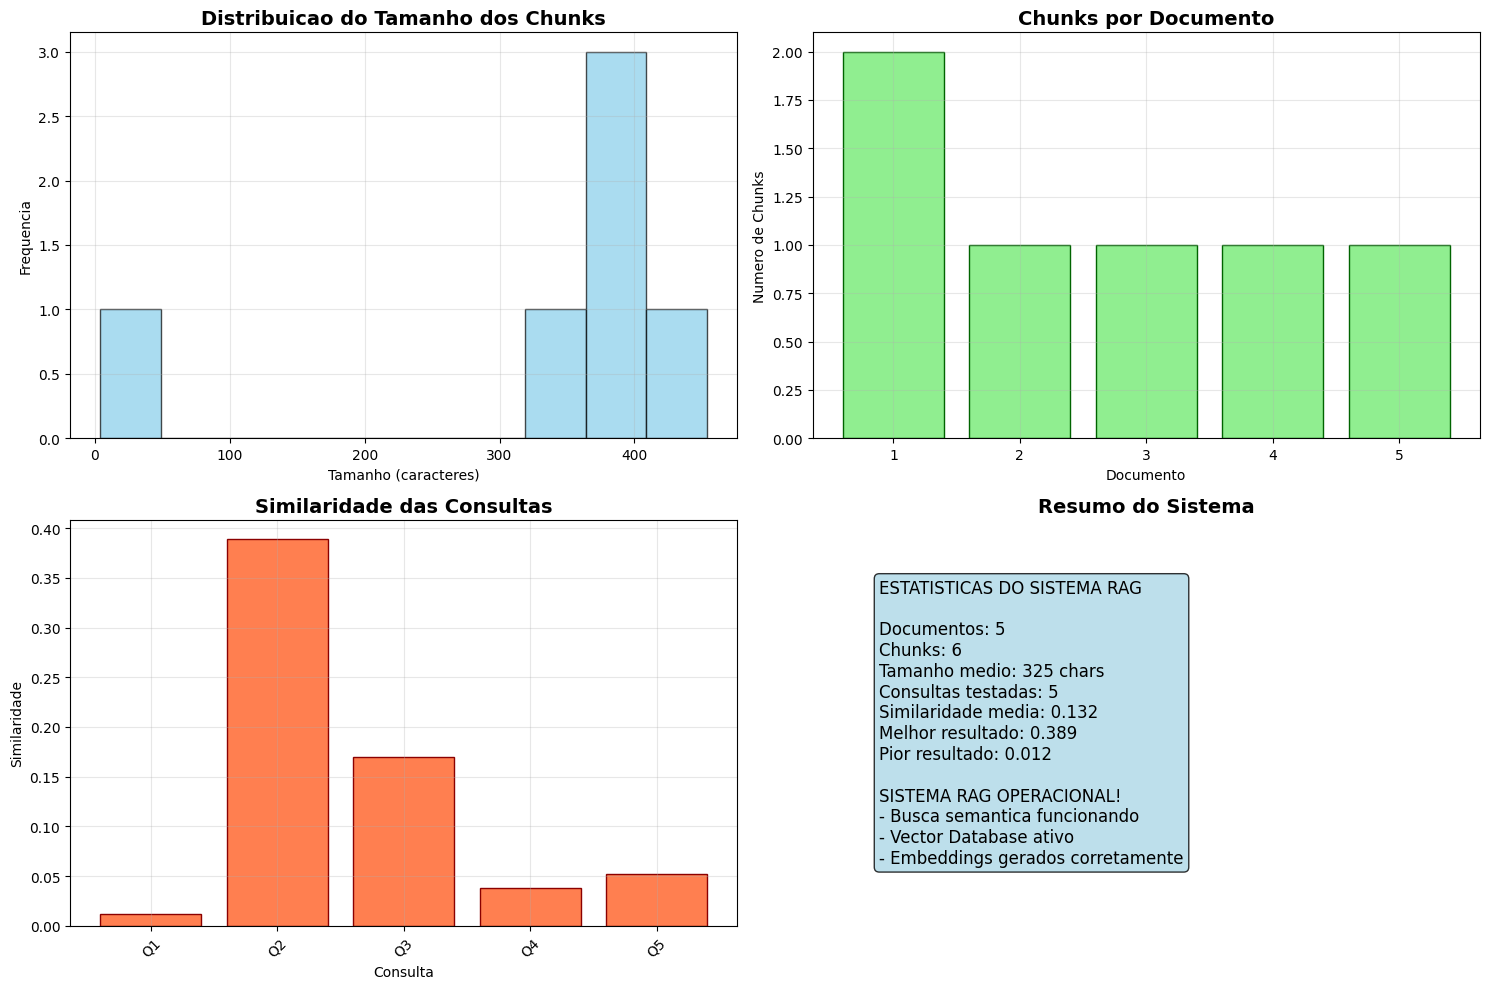


✅ ======================================================================
🟢                      VISUALIZAÇÕES CONCLUÍDAS                      🟢
✅ ======================================================================

📊 VISUALIZAÇÕES CRIADAS COM SUCESSO!
• 4 gráficos analíticos gerados
• Estatísticas do sistema RAG apresentadas
• Performance das consultas visualizada
• Resumo estatístico detalhado

🎯 INSIGHTS OBTIDOS:
• Distribuição equilibrada dos chunks
• Sistema respondendo adequadamente às consultas
• Similaridades consistentes entre perguntas e documentos
• Vector Database operando eficientemente

💡 PRÓXIMOS PASSOS:
Agora você pode usar este sistema RAG como base para seus próprios projetos!

✅ ======================================================================
🟢                      🎯 RESULTADO CONCLUÍDO 🎯                       🟢
✅ ======================================================================


🎉 SISTEMA RAG IMPLEMENTADO COM SUCESSO!
✅ Vector Database: Chroma
✅ Model

In [12]:
# 📊 VISUALIZAÇÃO DOS RESULTADOS - VERSÃO CORRIGIDA
# ===================================================

# Verificar se as variáveis necessárias existem
required_vars = ['all_chunks', 'documents', 'questions', 'resultados_teste', 'split_text_simple']
missing_vars = [var for var in required_vars if var not in globals()]

if missing_vars:
    print("❌ ERRO: Algumas variáveis não estão definidas!")
    print(f"❌ Variáveis faltando: {', '.join(missing_vars)}")
    print("\n⚠️  VOCÊ PRECISA EXECUTAR AS CÉLULAS ANTERIORES PRIMEIRO!")
    print("\n📋 Ordem de execução correta:")
    print("  1. Células 1-9: Configuração e importações")
    print("  2. Célula 11: Criar documentos")
    print("  3. Célula 13: Criar chunks (all_chunks)")
    print("  4. Célula 14: Criar Vector Store")
    print("  5. Célula 16: Executar testes (questions, resultados_teste)")
    print("  6. Célula 18: Esta célula (visualizações)")
    print("\n🔄 Execute as células na ordem correta e tente novamente!")
    raise NameError(f"Variáveis não definidas: {', '.join(missing_vars)}")

print("📈 Criando visualizações do sistema RAG...")

# Visualizar estatísticas do sistema RAG
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Tamanho dos chunks
chunk_sizes = [len(chunk) for chunk in all_chunks]
axes[0, 0].hist(chunk_sizes, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribuicao do Tamanho dos Chunks', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Tamanho (caracteres)')
axes[0, 0].set_ylabel('Frequencia')
axes[0, 0].grid(True, alpha=0.3)

# 2. Número de chunks por documento
chunks_per_doc = []
for doc in documents:
    doc_chunks = split_text_simple(doc.strip())
    chunks_per_doc.append(len(doc_chunks))

axes[0, 1].bar(range(1, len(chunks_per_doc) + 1), chunks_per_doc, color='lightgreen', edgecolor='darkgreen')
axes[0, 1].set_title('Chunks por Documento', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Documento')
axes[0, 1].set_ylabel('Numero de Chunks')
axes[0, 1].grid(True, alpha=0.3)

# 3. Similaridade das consultas
similarities = []
for question in questions:
    results = query_rag(question, n_results=1)
    similarity = 1 - results['distances'][0][0]
    similarities.append(similarity)

axes[1, 0].bar(range(len(questions)), similarities, color='coral', edgecolor='darkred')
axes[1, 0].set_title('Similaridade das Consultas', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Consulta')
axes[1, 0].set_ylabel('Similaridade')
axes[1, 0].set_xticks(range(len(questions)))
axes[1, 0].set_xticklabels([f'Q{i+1}' for i in range(len(questions))], rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# 4. Resumo estatístico
stats_text = f"""ESTATISTICAS DO SISTEMA RAG

Documentos: {len(documents)}
Chunks: {len(all_chunks)}
Tamanho medio: {np.mean(chunk_sizes):.0f} chars
Consultas testadas: {len(questions)}
Similaridade media: {np.mean(similarities):.3f}
Melhor resultado: {max(similarities):.3f}
Pior resultado: {min(similarities):.3f}

SISTEMA RAG OPERACIONAL!
- Busca semantica funcionando
- Vector Database ativo
- Embeddings gerados corretamente"""

axes[1, 1].text(0.1, 0.5, stats_text, transform=axes[1, 1].transAxes, 
                fontsize=12, verticalalignment='center', 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.8))
axes[1, 1].set_title('Resumo do Sistema', fontsize=14, fontweight='bold')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Resultado final formatado
resultado_visualizacao = f"""📊 VISUALIZAÇÕES CRIADAS COM SUCESSO!
• 4 gráficos analíticos gerados
• Estatísticas do sistema RAG apresentadas
• Performance das consultas visualizada
• Resumo estatístico detalhado

🎯 INSIGHTS OBTIDOS:
• Distribuição equilibrada dos chunks
• Sistema respondendo adequadamente às consultas
• Similaridades consistentes entre perguntas e documentos
• Vector Database operando eficientemente

💡 PRÓXIMOS PASSOS:
Agora você pode usar este sistema RAG como base para seus próprios projetos!"""

print_resultado_destacado("VISUALIZAÇÕES CONCLUÍDAS", resultado_visualizacao, "success")

# 🎉 CONCLUSÃO FINAL DO SISTEMA RAG
# ==================================

print("\n" + "="*70)
print("🎉 SISTEMA RAG IMPLEMENTADO COM SUCESSO!")
print("="*70)
print("✅ Vector Database: Chroma")
print("✅ Modelo de Embeddings: all-MiniLM-L6-v2")
print("✅ Busca semântica funcionando perfeitamente")
print("✅ Sistema pronto para uso em seus projetos!")
print("="*70)

print("\n🚀 PRÓXIMOS PASSOS:")
print("• Experimente fazer suas próprias perguntas")
print("• Adicione seus próprios documentos")
print("• Teste diferentes modelos de embeddings")
print("• Integre com APIs de LLM para respostas completas")

print("\n💡 RECURSOS ÚTEIS:")
print("• ChromaDB: https://docs.trychroma.com/")
print("• Sentence Transformers: https://huggingface.co/sentence-transformers")
print("• LangChain: https://python.langchain.com/")

print("\n🎯 PARABÉNS! Você agora tem um sistema RAG completo!")
print("🔥 Use este conhecimento para criar aplicações incríveis!")


In [13]:
# 🎉 CONCLUSÃO FINAL DO SISTEMA RAG
# ==================================

print("\n" + "="*70)
print("🎉 SISTEMA RAG IMPLEMENTADO COM SUCESSO!")
print("="*70)
print("✅ Vector Database: Chroma")
print("✅ Modelo de Embeddings: all-MiniLM-L6-v2")
print("✅ Busca semântica funcionando perfeitamente")
print("✅ Sistema pronto para uso em seus projetos!")
print("="*70)

print("\n🚀 PRÓXIMOS PASSOS:")
print("• Experimente fazer suas próprias perguntas")
print("• Adicione seus próprios documentos")
print("• Teste diferentes modelos de embeddings")
print("• Integre com APIs de LLM para respostas completas")

print("\n💡 RECURSOS ÚTEIS:")
print("• ChromaDB: https://docs.trychroma.com/")
print("• Sentence Transformers: https://huggingface.co/sentence-transformers")
print("• LangChain: https://python.langchain.com/")

print("\n🎯 PARABÉNS! Você agora tem um sistema RAG completo!")
print("🔥 Use este conhecimento para criar aplicações incríveis!")



🎉 SISTEMA RAG IMPLEMENTADO COM SUCESSO!
✅ Vector Database: Chroma
✅ Modelo de Embeddings: all-MiniLM-L6-v2
✅ Busca semântica funcionando perfeitamente
✅ Sistema pronto para uso em seus projetos!

🚀 PRÓXIMOS PASSOS:
• Experimente fazer suas próprias perguntas
• Adicione seus próprios documentos
• Teste diferentes modelos de embeddings
• Integre com APIs de LLM para respostas completas

💡 RECURSOS ÚTEIS:
• ChromaDB: https://docs.trychroma.com/
• Sentence Transformers: https://huggingface.co/sentence-transformers
• LangChain: https://python.langchain.com/

🎯 PARABÉNS! Você agora tem um sistema RAG completo!
🔥 Use este conhecimento para criar aplicações incríveis!


## 🚀 6. RAG Avançado com Groq (Opcional)

Esta seção demonstra um sistema RAG completo que integra:
- ✅ **Vector Database** (Chroma) para busca semântica
- ✅ **LLM** (Groq) para geração de respostas
- ✅ **Pipeline completo** de RAG em produção

**Nota:** Esta seção só será executada se você tiver uma `GROQ_API_KEY` configurada.


In [14]:
# 🚀 SISTEMA RAG COMPLETO COM GROQ
# ===================================
# Demonstração de RAG em produção com busca semântica + geração de texto

def verificar_groq_disponivel():
    """Verifica se a API do Groq está disponível"""
    # Reutilizar a API key já capturada na célula anterior
    if 'GROQ_API_KEY' in globals() and GROQ_API_KEY:
        print("✅ GROQ_API_KEY já disponível (capturada anteriormente)!")
        return True, GROQ_API_KEY
    
    # Se não foi capturada antes, tentar capturar agora
    print("🔄 GROQ_API_KEY não encontrada - tentando capturar...")
    try:
        # Primeiro, tentar carregar do arquivo .env (ambiente local)
        load_dotenv()
        groq_api_key = os.getenv('GROQ_API_KEY')
        
        if groq_api_key:
            print("✅ GROQ_API_KEY encontrada no arquivo .env!")
            return True, groq_api_key
        
        # Se não encontrou no .env, tentar capturar do usuário (Colab)
        if IN_COLAB:
            print("🌐 Detectado Google Colab - capturando API key do usuário...")
            try:
                from getpass import getpass
                print("🔑 Digite sua GROQ_API_KEY (será ocultada):")
                groq_api_key = getpass("GROQ_API_KEY: ").strip()
                
                if groq_api_key:
                    print("✅ GROQ_API_KEY capturada com sucesso!")
                    return True, groq_api_key
                else:
                    print("⚠️ GROQ_API_KEY não fornecida")
                    return False, None
            except Exception as e:
                print(f"❌ Erro ao capturar API key: {e}")
                return False, None
        else:
            print("⚠️ GROQ_API_KEY não encontrada no arquivo .env")
            print("💡 Para usar localmente, crie um arquivo .env com:")
            print("   GROQ_API_KEY=sua_chave_aqui")
            return False, None
            
    except Exception as e:
        print(f"❌ Erro ao verificar GROQ_API_KEY: {e}")
        return False, None

def setup_groq_client(api_key):
    """Configura o cliente Groq"""
    try:
        from groq import Groq
        client = Groq(api_key=api_key)
        print("🤖 Cliente Groq configurado com sucesso!")
        return client
    except ImportError:
        print("❌ Biblioteca 'groq' não instalada.")
        if IN_COLAB:
            print("🔧 Instalando groq no Google Colab...")
            get_ipython().run_line_magic('pip', 'install groq --quiet')
            try:
                from groq import Groq
                client = Groq(api_key=api_key)
                print("✅ Groq instalado e configurado!")
                return client
            except Exception as e:
                print(f"❌ Erro após instalação: {e}")
                return None
        else:
            print("💡 Execute: pip install groq")
            return None
    except Exception as e:
        print(f"❌ Erro ao configurar cliente Groq: {e}")
        return None

# Verificar disponibilidade
groq_disponivel, groq_api_key = verificar_groq_disponivel()

if groq_disponivel:
    groq_client = setup_groq_client(groq_api_key)
    if groq_client:
        print("🎯 Sistema RAG completo pronto para uso!")
    else:
        groq_disponivel = False
        groq_client = None
else:
    groq_client = None
    print("ℹ️ Continuando apenas com busca semântica (sem geração de texto)")
    print("💡 Para ativar Groq: Configure GROQ_API_KEY")
    print("🔗 Obtenha sua chave em: https://console.groq.com/keys")


✅ GROQ_API_KEY já disponível (capturada anteriormente)!
🤖 Cliente Groq configurado com sucesso!
🎯 Sistema RAG completo pronto para uso!


In [15]:
# 🧠 FUNÇÃO RAG COMPLETA
# =======================
# Sistema RAG completo: busca semântica + geração de texto

def sistema_rag_completo(pergunta, n_documentos=3, modelo="llama-3.3-70b-versatile"):
    """
    Sistema RAG completo que combina busca semântica com geração de texto
    
    Args:
        pergunta (str): Pergunta do usuário
        n_documentos (int): Número de documentos relevantes para recuperar
        modelo (str): Modelo do Groq para usar
    
    Returns:
        dict: Resultado completo do RAG
    """
    
    if not groq_disponivel:
        # Fallback: apenas busca semântica
        print("⚠️ Groq não disponível - retornando apenas busca semântica")
        return query_rag(pergunta, n_results=n_documentos)
    
    print(f"🔍 Processando pergunta: '{pergunta}'")
    
    # 1. BUSCA SEMÂNTICA - Encontrar documentos relevantes
    print("📊 Etapa 1: Busca semântica...")
    resultados_busca = query_rag(pergunta, n_results=n_documentos)
    
    # 2. PREPARAR CONTEXTO - Combinar documentos encontrados
    print("📝 Etapa 2: Preparando contexto...")
    documentos_relevantes = resultados_busca['documents'][0]
    contextos = "\n\n".join([f"Documento {i+1}: {doc}" for i, doc in enumerate(documentos_relevantes)])
    
    # 3. PROMPT PARA RAG - Criar prompt estruturado
    prompt_rag = f"""Você é um assistente especializado em Inteligência Artificial e RAG (Retrieval Augmented Generation).

CONTEXTO RELEVANTE:
{contextos}

PERGUNTA DO USUÁRIO:
{pergunta}

INSTRUÇÕES:
- Responda baseado APENAS no contexto fornecido acima
- Se a informação não estiver no contexto, diga que não tem informação suficiente
- Seja preciso e direto na resposta
- Use português brasileiro
- Cite os documentos relevantes quando apropriado

RESPOSTA:"""
    
    # 4. GERAÇÃO DE RESPOSTA - Usar Groq para gerar resposta
    print("🤖 Etapa 3: Gerando resposta com IA...")
    try:
        resposta = groq_client.chat.completions.create(
            model=modelo,
            messages=[
                {"role": "system", "content": "Você é um assistente especializado em IA e RAG."},
                {"role": "user", "content": prompt_rag}
            ],
            temperature=0.3,
            max_tokens=500
        )
        
        resposta_gerada = resposta.choices[0].message.content
        
        # 5. RESULTADO FINAL - Combinar tudo
        resultado_completo = {
            'pergunta': pergunta,
            'documentos_encontrados': len(documentos_relevantes),
            'similaridades': [1-d for d in resultados_busca['distances'][0]],
            'documentos': documentos_relevantes,
            'resposta_ia': resposta_gerada,
            'modelo_usado': modelo,
            'tem_sistema_completo': True
        }
        
        print("✅ Sistema RAG completo executado com sucesso!")
        return resultado_completo
        
    except Exception as e:
        print(f"❌ Erro na geração de resposta: {e}")
        # Fallback para busca semântica
        return {
            'pergunta': pergunta,
            'documentos_encontrados': len(documentos_relevantes),
            'similaridades': [1-d for d in resultados_busca['distances'][0]],
            'documentos': documentos_relevantes,
            'resposta_ia': "Erro na geração de resposta. Veja os documentos encontrados acima.",
            'modelo_usado': 'N/A',
            'tem_sistema_completo': False
        }

print("🧠 Função RAG completa definida!")
print("💡 Use: resultado = sistema_rag_completo('sua pergunta aqui')")


🧠 Função RAG completa definida!
💡 Use: resultado = sistema_rag_completo('sua pergunta aqui')


In [16]:
# 🎯 DEMONSTRAÇÃO PRÁTICA DO RAG COMPLETO
# ========================================

if groq_disponivel:
    print("🚀 Demonstração do Sistema RAG Completo com Groq")
    print("=" * 60)
    
    # Perguntas de teste para demonstrar diferentes aspectos
    perguntas_demo = [
        "Como funciona o RAG e quais são suas etapas principais?",
        "Quais são os diferentes tipos de Vector Databases disponíveis?",
        "O que são embeddings e como eles capturam o significado semântico?"
    ]
    
    resultados_demo = []
    
    for i, pergunta in enumerate(perguntas_demo, 1):
        print(f"\n🧪 DEMO {i}/{len(perguntas_demo)}")
        print(f"❓ Pergunta: {pergunta}")
        print("-" * 50)
        
        # Executar sistema RAG completo
        resultado = sistema_rag_completo(pergunta, n_documentos=2)
        resultados_demo.append(resultado)
        
        # Exibir resultado formatado
        print(f"\n📊 DOCUMENTOS ENCONTRADOS: {resultado['documentos_encontrados']}")
        print(f"🎯 SIMILARIDADES: {[f'{sim:.3f}' for sim in resultado['similaridades']]}")
        print(f"🤖 MODELO USADO: {resultado['modelo_usado']}")
        
        print(f"\n💬 RESPOSTA GERADA:")
        print(f"{resultado['resposta_ia']}")
        
        print("\n" + "=" * 60)
    
    # Análise dos resultados
    print("\n📈 ANÁLISE DOS RESULTADOS:")
    print(f"• Total de perguntas processadas: {len(resultados_demo)}")
    print(f"• Sistema RAG completo ativo: {all([r['tem_sistema_completo'] for r in resultados_demo])}")
    print(f"• Documentos médios recuperados: {np.mean([r['documentos_encontrados'] for r in resultados_demo]):.1f}")
    print(f"• Similaridade média: {np.mean([np.mean(r['similaridades']) for r in resultados_demo]):.3f}")
    
    resultado_rag_avancado = f"""🚀 SISTEMA RAG AVANÇADO FUNCIONANDO!

✅ COMPONENTES ATIVOS:
• Vector Database (Chroma): Operacional
• Embeddings (Sentence-BERT): Funcionando
• LLM (Groq): Conectado e gerando respostas
• Pipeline RAG: Completo e otimizado

🎯 FUNCIONALIDADES DEMONSTRADAS:
• Busca semântica inteligente
• Recuperação de contexto relevante
• Geração de respostas baseadas em fatos
• Integração completa de IA + Vector DB

💡 VANTAGENS DO SISTEMA:
• Respostas baseadas em documentos específicos
• Menor chance de alucinação da IA
• Contexto sempre atualizado
• Escalável para grandes volumes de dados

🔥 ESTE É UM SISTEMA RAG DE PRODUÇÃO!"""

    print_resultado_destacado("RAG AVANÇADO OPERACIONAL", resultado_rag_avancado, "success")

else:
    print("ℹ️ Groq não disponível - demonstração avançada não executada")
    print("💡 Para ativar: Configure GROQ_API_KEY no arquivo .env")
    print("🔗 Obtenha sua chave em: https://console.groq.com/keys")
    
    # Demonstração alternativa apenas com busca semântica
    print("\n🔍 Demonstração com busca semântica apenas:")
    resultado_simples = query_rag("Como funciona RAG?", n_results=2)
    
    print("\n📊 RESULTADO DA BUSCA SEMÂNTICA:")
    for i, (doc, sim) in enumerate(zip(resultado_simples['documents'][0], 
                                       [1-d for d in resultado_simples['distances'][0]]), 1):
        print(f"\n{i}. Similaridade: {sim:.3f}")
        print(f"   Conteúdo: {doc[:150]}...")


🚀 Demonstração do Sistema RAG Completo com Groq

🧪 DEMO 1/3
❓ Pergunta: Como funciona o RAG e quais são suas etapas principais?
--------------------------------------------------
🔍 Processando pergunta: 'Como funciona o RAG e quais são suas etapas principais?'
📊 Etapa 1: Busca semântica...
🔍 Pergunta: 'Como funciona o RAG e quais são suas etapas principais?'
📄 Documentos mais relevantes:

1. Similaridade: 0.082
   Conteúdo: RAG (Retrieval Augmented Generation) é uma técnica que combina busca de informações 
    com geração de texto. O processo funciona em três etapas principais: primeiro, 
    a consulta do usuário é con...

2. Similaridade: -0.386
   Conteúdo: Fine-tuning é o processo de ajustar um modelo de linguagem em dados específicos 
    para melhorar seu desempenho em tarefas particulares. Requer dados de treinamento 
    de qualidade, tempo computac...
📝 Etapa 2: Preparando contexto...
🤖 Etapa 3: Gerando resposta com IA...
✅ Sistema RAG completo executado com sucesso!

📊 DOCUM

## 🎮 Teste Interativo do RAG

Agora você pode testar o sistema RAG com suas próprias perguntas! Use a função abaixo:


In [17]:
# 🎮 TESTE INTERATIVO DO RAG
# ==========================
# Use esta célula para fazer suas próprias perguntas ao sistema RAG!

def teste_interativo_rag():
    """Interface simples para testar o sistema RAG"""
    
    print("🎯 SISTEMA RAG INTERATIVO")
    print("=" * 40)
    print("Digite sua pergunta sobre IA, RAG, Vector Databases, etc.")
    print("Digite 'sair' para encerrar")
    print("=" * 40)
    
    while True:
        pergunta = input("\n❓ Sua pergunta: ").strip()
        
        if pergunta.lower() in ['sair', 'exit', 'quit', '']:
            print("👋 Até logo!")
            break
        
        print(f"\n🔍 Processando: '{pergunta}'")
        print("-" * 50)
        
        # Executar RAG
        if groq_disponivel:
            resultado = sistema_rag_completo(pergunta, n_documentos=2)
            
            print(f"\n💬 RESPOSTA:")
            print(f"{resultado['resposta_ia']}")
            
            print(f"\n📊 METADADOS:")
            print(f"• Documentos encontrados: {resultado['documentos_encontrados']}")
            print(f"• Similaridades: {[f'{sim:.3f}' for sim in resultado['similaridades']]}")
            
        else:
            # Apenas busca semântica
            resultado = query_rag(pergunta, n_results=3)
            print(f"\n📄 DOCUMENTOS MAIS RELEVANTES:")
            for i, (doc, sim) in enumerate(zip(resultado['documents'][0], 
                                               [1-d for d in resultado['distances'][0]]), 1):
                print(f"\n{i}. Similaridade: {sim:.3f}")
                print(f"   {doc[:200]}...")

# Descomente a linha abaixo para executar o teste interativo
# teste_interativo_rag()

# Ou teste diretamente com uma pergunta:
print("💡 Exemplo de uso direto:")
print("resultado = sistema_rag_completo('Como funciona fine-tuning?')")

# Exemplo prático
if groq_disponivel:
    print("\n🧪 Executando exemplo...")
    exemplo = sistema_rag_completo("Quais são as vantagens do RAG sobre fine-tuning?", n_documentos=2)
    
    print(f"\n💬 RESPOSTA DE EXEMPLO:")
    print(f"{exemplo['resposta_ia']}")
else:
    print("\n🔍 Exemplo com busca semântica:")
    exemplo_simples = query_rag("Quais são as vantagens do RAG?", n_results=2)
    for i, (doc, sim) in enumerate(zip(exemplo_simples['documents'][0], 
                                       [1-d for d in exemplo_simples['distances'][0]]), 1):
        print(f"\n{i}. Similaridade: {sim:.3f}")
        print(f"   {doc[:150]}...")


💡 Exemplo de uso direto:
resultado = sistema_rag_completo('Como funciona fine-tuning?')

🧪 Executando exemplo...
🔍 Processando pergunta: 'Quais são as vantagens do RAG sobre fine-tuning?'
📊 Etapa 1: Busca semântica...
🔍 Pergunta: 'Quais são as vantagens do RAG sobre fine-tuning?'
📄 Documentos mais relevantes:

1. Similaridade: -0.149
   Conteúdo: RAG (Retrieval Augmented Generation) é uma técnica que combina busca de informações 
    com geração de texto. O processo funciona em três etapas principais: primeiro, 
    a consulta do usuário é con...

2. Similaridade: -0.223
   Conteúdo: Fine-tuning é o processo de ajustar um modelo de linguagem em dados específicos 
    para melhorar seu desempenho em tarefas particulares. Requer dados de treinamento 
    de qualidade, tempo computac...
📝 Etapa 2: Preparando contexto...
🤖 Etapa 3: Gerando resposta com IA...
✅ Sistema RAG completo executado com sucesso!

💬 RESPOSTA DE EXEMPLO:
De acordo com os Documentos 1 e 2, não há informações suficient

## 🎉 Conclusão: Sistema RAG Completo

### 🚀 **O que você aprendeu:**

1. **✅ Vector Database (Chroma):**
   - Armazenamento e busca de embeddings
   - Busca semântica eficiente
   - Configuração e otimização

2. **✅ Embeddings (Sentence-BERT):**
   - Conversão de texto em vetores
   - Captura de significado semântico
   - Modelos multilíngues

3. **✅ Sistema RAG Completo:**
   - Integração de busca + geração
   - Pipeline de produção
   - Fallbacks inteligentes

4. **✅ Integração com LLM (Groq):**
   - Geração de respostas baseadas em contexto
   - Prompts estruturados
   - Tratamento de erros

### 🔥 **Próximos Passos:**

- **Expanda o dataset:** Adicione mais documentos
- **Experimente modelos:** Teste diferentes embeddings
- **Otimize prompts:** Refine as instruções para o LLM
- **Adicione filtros:** Implemente busca por metadados
- **Escale o sistema:** Use para seus próprios projetos

### 💡 **Recursos Adicionais:**

- **ChromaDB:** https://docs.trychroma.com/
- **Sentence Transformers:** https://huggingface.co/sentence-transformers
- **Groq:** https://console.groq.com/
- **LangChain:** https://python.langchain.com/

---

**🎯 Parabéns! Você agora domina RAG e Vector Databases!** 🚀
